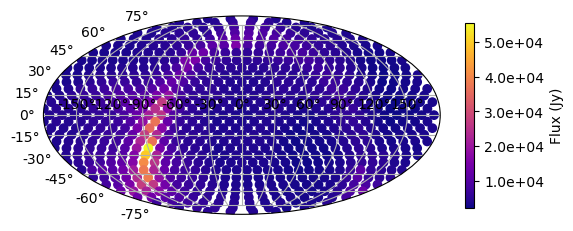

In [1]:
  >>> import os
  >>> import numpy as np
  >>> import math
  >>> import matplotlib.pyplot as plt
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> from astropy import units as u
  >>> from astropy_healpix import HEALPix
  >>> sm = SkyModel()

  >>> filename = os.path.join(DATA_PATH, "gsm_icrs.skyh5")
  >>> sm.read_skyh5(filename)

  >>> ra, dec = sm.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(ra.wrap_at('180d').radian, dec.radian, c=sm.stokes[0,0,:], cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP



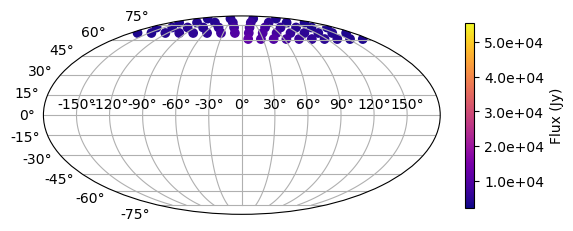

In [7]:
  >>> # You can specify component inds to select. First we'll just try selecting the
  >>> # first 50 components.
  >>> sm_new = sm.copy()
  >>> inds = list(range(0, 50))
  >>> sm_new.select(component_inds=inds)

  >>> ra_new, dec_new = sm_new.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(
  ...   ra_new.wrap_at('180d').radian,
  ...   dec_new.radian,
  ...   c=sm_new.stokes[0,0,:],
  ...   cmap="plasma",
  ...   vmin=np.min(sm.stokes.value[0,0,:]),
  ...   vmax=np.max(sm.stokes.value[0,0,:])
  ... )
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP


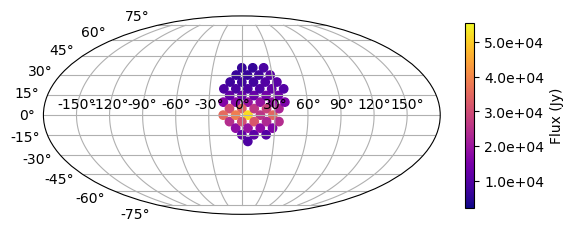

In [9]:
  >>> # Let's change over to galactic coordinates using healpix_interp_transform
  >>> sm_galactic = sm.copy()
  >>> sm_galactic.healpix_interp_transform("galactic")

  >>> # Figuring out which indices you want can be a little complicated, especially since
  >>> # there are two possible indexing schemes for Healpix maps ('ring' and 'nested').
  >>> # Of course you can do it by using the pixel coordinates, but there are also
  >>> # some nice convenience functions in the astropy_healpix library that can help.
  >>> hp = HEALPix(sm_galactic.nside, sm_galactic.hpx_order, sm_galactic.frame)
  >>> cone_index = hp.cone_search_lonlat(10 * u.deg, 10 * u.deg, radius=25 * u.deg)
  >>> sm_gal_cone = sm_galactic.select(component_inds=cone_index, inplace=False)
  >>> l_cone, b_cone = sm_gal_cone.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(
  ...   l_cone.wrap_at('180d').radian,
  ...   b_cone.radian,
  ...   c=sm_gal_cone.stokes[0,0,:],
  ...   cmap="plasma",
  ...   vmin=np.min(sm.stokes.value[0,0,:]),
  ...   vmax=np.max(sm.stokes.value[0,0,:])
  ... )
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP


[463 431 399 336 368 401 432 464]


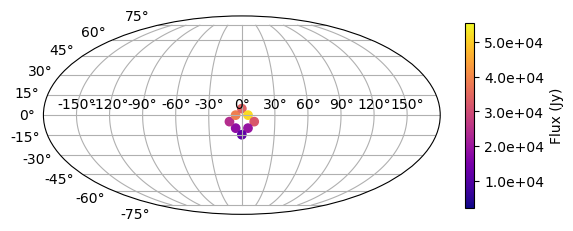

In [10]:
  >>> # The astropy-healpix `neighbours` method can identify all the neighboring
  >>> # pixel indices for a given pixel
  >>> neighbours = hp.neighbours(400)
  >>> print(neighbours)
  # [21 20  9  2  3 11 22 37]
  >>> sm_gal_nb = sm_galactic.select(component_inds=neighbours, inplace=False)
  >>> l_nb, b_nb = sm_gal_nb.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(
  ...   l_nb.wrap_at('180d').radian,
  ...   b_nb.radian,
  ...   c=sm_gal_nb.stokes[0,0,:],
  ...   cmap="plasma",
  ...   vmin=np.min(sm.stokes.value[0,0,:]),
  ...   vmax=np.max(sm.stokes.value[0,0,:])
  ... )
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP